### 摘要：
>此文档介绍了Lasso方法在多元线性回归中的应用及常见求解方法，以及sklearn包中关于Lasso的类的缺点。最后介绍了自定义 *LARS* 类的功能、用法，源程序详见`LARS.py`，以及src文件夹中若干子程序。

### 1. Lasso方法及其在多元线性回归中的求解

&emsp; Lasso全称Least absolute shrinkage and selection operator，是一种以最小化绝对值（1范数）为惩罚函数的压缩估计方法，可以将变量的系数进行压缩并使某些回归系数变为0，进而达到变量选择的目的。Lasso方法可以应用于许多回归当中，对于多元线性回归，系数估计表达式可写成：

$$\begin{align}
  & \hat{\beta }(\lambda )=\arg \min \frac{1}{2}\parallel Y-X\beta \parallel _{2}^{2}+\lambda \parallel \beta {{\parallel }_{1}} \\ 
 & \hat{\beta }(\alpha )=\arg \min \frac{1}{2n}\parallel Y-X\beta \parallel _{2}^{2}+\alpha \parallel \beta {{\parallel }_{1}}  
\end{align}$$

&emsp; 其中$\alpha=\frac{\lambda}{2n}$，消除了样本量的影响，下文将采用$\alpha$作为惩罚系数。

&emsp; 对于多元线性回归的Lasso方法，常见的解法有最小角回归法（LARS）、坐标轴下降法：

1. 最小角回归法，通过系数$\hat{\beta }(\alpha )$分段线性变化的特点，计算其变化规律，然后再通过代入相应的惩罚系数$\alpha$来计算系数估计。


2. 坐标轴下降法，通过类似梯度下降法的启发式算法一步步迭代求解函数的最小值。

&emsp; 在给定一个$\alpha$时，最小角回归法需要计算全局的变化规律，计算量较大。当给定若干$\alpha$时，最小角回归法，只需计算一次路径变化规律，然后代入$\alpha$即可，坐标轴下降法需要若干次迭代过程。可见，当需要展示$\hat{\beta }(\alpha )$变化规律，或者从若干$\alpha$中寻找最优值时，最小角回归法有一定的优势。

### 2. sklearn包中关于Lasso的类存在的问题

&emsp; sklearn包中主要有以下几个类解决多元线性回归的Lasso问题：*Lasso*、*LARS*、*LassoCV*、*lars_path* 

1. *Lasso*：通过坐标轴下降法、LARS，计算一个$\alpha$下系数估计结果，无法同时拟合不同$\alpha$下的多组系数。

2. *LassoCV*：通过坐标下降法，由内置算法给出交叉验证下最优的$\alpha$，但无法自定义一组$\alpha$去比较优劣。

3. *LARS*和*lars_path*：通过最小角回归法，给出$\hat{\beta }(\alpha )$的变化路径，但无法计算任一$\alpha$下系数估计结果。并且，在最小角回归的过程中算法存在错误，只包含变量进入过程，缺少变量退出过程。


&emsp; 此外，在上述类的初始化时，只能选择是否对x规范化，而不是标准化，也不能对y进行规范化或标准化操作。

### 3. 自定义LARS类介绍
&emsp; 自定义LARS类的语法与sklearn风格类似，融合了以上几个类的优点。具体介绍如下：

**Class LARS**：

Parameters:	

* x：&emsp;&emsp; &emsp; &emsp;  &emsp; &emsp; np.array 自变量 nxp维
* y：&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; np.array 因变量 n维
* fit_intercept：&emsp; &emsp; &emsp; bool 是否在拟合截距项，默认为True
* standarize：&emsp; &emsp; &emsp; bool 是否在拟合前对x、y进行规范化，默认为True

Methods:

* get_path(plot=False)：&emsp; &emsp;计算$\hat{\beta }(\alpha )$和$\alpha$的变化路径，plot = True则输出系数变化规律图
* fit(alpha)：&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;计算给定alpha下的系数估计，alpha为float或list
* cv_fit(self, alpha, k=10)：&emsp;计算给定一组$\alpha$下，交叉验证后的最优$\alpha$及其$\hat{\beta }(\alpha )$，k为交叉验证折数
* predict(tx, coef)：&emsp; &emsp;&emsp;&emsp;计算给定预测集x和$\hat{\beta }(\alpha )$下的预测结果


Attributes(Public):

* alphas：&emsp; &emsp; &emsp; np.array $\alpha$的变化路径
* coefs：&emsp; &emsp; &emsp; np.array $\hat{\beta }(\alpha )$的变化路径
* coef_：&emsp; &emsp; &emsp; np.array 给定$\alpha$下的系数估计
* cv_coef：&emsp; &emsp; &emsp; np.array 给定一组$\alpha$下，最优系数估计

### 4.应用举例

In [1]:
## 加载包
from LARS import LARS
import numpy as np
from sklearn import linear_model

In [2]:
## 读取prostate数据
x = np.loadtxt("./data/x.txt", delimiter=",")
y = np.loadtxt("./data/y.txt", delimiter=",")

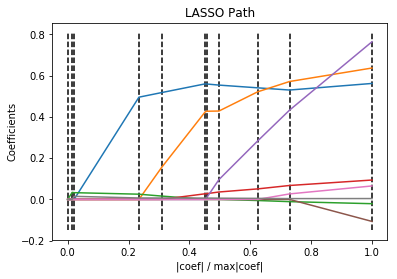

alpha变化路径：


array([1.59727080e+02, 1.91144338e+01, 7.54005235e-01, 1.91411237e-01,
       1.51525256e-01, 7.96034835e-02, 7.85423072e-02, 6.80442004e-02,
       4.41090192e-02, 2.58825176e-02, 0.00000000e+00])

coef变化路径：


[array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.        , 0.03401599, 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.03263936, 0.        , 0.        ,
        0.        , 0.        , 0.01489666]),
 array([0.4950816 , 0.        , 0.02531756, 0.        , 0.        ,
        0.        , 0.        , 0.00695358]),
 array([0.51723635, 0.15420103, 0.01620695, 0.        , 0.        ,
        0.        , 0.        , 0.006854  ]),
 array([5.59484954e-01, 4.23438341e-01, 2.03631372e-04, 2.72638275e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.56126868e-03]),
 array([0.55890604, 0.42702278, 0.        , 0.02794674, 0.00836126,
        0.        , 0.        , 0.00652016]),
 array([0.55358771, 0.42796358, 0.        , 0.03590925, 0.09602199,
        0.        , 0.        , 0.00594543]),
 array([ 0.5403864 ,  0.5209544 , -0.00530159,  0.05088817,  0.282874  ,
         0.        ,  0.        ,  0.00507735]),
 array

各alpha下的coef：


array([[ 0.5492669 ,  0.61105209, -0.01690408,  0.08367687,  0.63560517,
        -0.06542811,  0.05029353,  0.00408771],
       [ 0.54750354,  0.3470845 ,  0.00474206,  0.01953199,  0.        ,
         0.        ,  0.        ,  0.00664428],
       [ 0.        ,  0.        ,  0.03265781,  0.        ,  0.        ,
         0.        ,  0.        ,  0.01469707],
       [ 0.        ,  0.        ,  0.03333261,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00739496]])

best alpha: 0.01


array([ 0.5492669 ,  0.61105209, -0.01690408,  0.08367687,  0.63560517,
       -0.06542811,  0.05029353,  0.00408771])

预测结果：


array([0.80506745, 0.77838072, 0.52151864, 0.64067885, 1.73849652,
       0.82760718, 1.88947952, 2.08417438, 1.21827391, 1.31665652])

In [3]:
%matplotlib inline
## 自定义类
model = LARS(x, y, fit_intercept=False, standarize=False)
# 计算变化路径并输出图像
model.get_path(plot = True)
print("alpha变化路径：")
model.alphas
print("coef变化路径：")
model.coefs
# 给定一组alpha
alpha = [0.01, 0.1,1,10]
# 计算各alpha下的系数
model.fit(alpha)
print("各alpha下的coef：")
model.coef_
# 计算cv下最优系数
model.cv_fit(alpha, k=10)
model.cv_coef
# 预测
print("预测结果：")
model.predict(x[:10,:], model.cv_coef)

In [4]:
## 与系统函数结果进行比较
sys = linear_model.Lars(fit_intercept=False, normalize=False)
sys.fit(x,y)
print("alpha变化路径：")
sys.alphas_
print("coef变化路径：")
sys.coef_path_.T
print("alpha=0.01下的coef：")
sys2 = linear_model.Lasso(alpha=0.01, fit_intercept=False, normalize=False)
sys2.fit(x,y)
sys2.coef_
print("best alpha：")
sys3 = linear_model.LassoCV(fit_intercept=False, normalize=False, cv = 10, n_alphas=100)
sys3.fit(x,y)
sys3.alpha_
sys3.coef_
print("预测结果:")
sys2.predict(x[:10,:])

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=False,
   fit_path=True, n_nonzero_coefs=500, normalize=False, positive=False,
   precompute='auto', verbose=False)

alpha变化路径：


array([1.59727080e+02, 1.91144338e+01, 7.54005235e-01, 1.91411237e-01,
       1.51525256e-01, 7.96034835e-02, 5.23843159e-02, 4.44461512e-02,
       3.75483690e-02, 0.00000000e+00])

coef变化路径：


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.40159929e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.26393617e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.48966581e-02],
       [ 4.95081597e-01,  0.00000000e+00,  2.53175641e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.95357610e-03],
       [ 5.17236353e-01,  1.54201027e-01,  1.62069513e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.85399632e-03],
       [ 5.59484954e-01,  4.23438341e-01,  2.03631372e-04,
         2.72638275e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.56126868e-03],
       [ 5.44635901e-01,  5.153791

alpha=0.01下的coef：


Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

array([ 0.54946761,  0.61114681, -0.01710862,  0.08397654,  0.63577876,
       -0.06571473,  0.05217373,  0.00407071])

best alpha：


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=False,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

0.1597270798731959

array([0.51242536, 0.12542418, 0.01791706, 0.        , 0.        ,
       0.        , 0.        , 0.00688357])

预测结果:


array([0.80624954, 0.77789542, 0.51933833, 0.64014797, 1.73755412,
       0.82873845, 1.88872884, 2.08492454, 1.22010308, 1.31538575])

除小数点后几位有误差外，自定义类与sklearn结果基本一致。但实现以上功能，sklearn需要调用多个类。


从sklearn中Lars类的计算结果可以看出，算法中只包括变量前进，不包括变量后退。用sklearn的Lasso类验证可知，后退过程的确存在，Lars类存在问题。

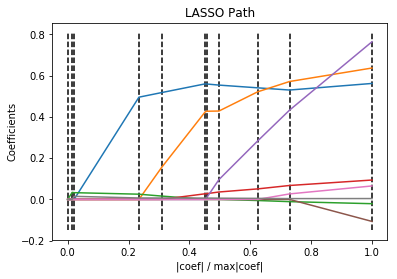

alpha变化路径：


array([1.59727080e+02, 1.91144338e+01, 7.54005235e-01, 1.91411237e-01,
       1.51525256e-01, 7.96034835e-02, 7.85423072e-02, 6.80442004e-02,
       4.41090192e-02, 2.58825176e-02, 0.00000000e+00])

coef变化路径：


[array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.        , 0.03401599, 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.03263936, 0.        , 0.        ,
        0.        , 0.        , 0.01489666]),
 array([0.4950816 , 0.        , 0.02531756, 0.        , 0.        ,
        0.        , 0.        , 0.00695358]),
 array([0.51723635, 0.15420103, 0.01620695, 0.        , 0.        ,
        0.        , 0.        , 0.006854  ]),
 array([5.59484954e-01, 4.23438341e-01, 2.03631372e-04, 2.72638275e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.56126868e-03]),
 array([0.55890604, 0.42702278, 0.        , 0.02794674, 0.00836126,
        0.        , 0.        , 0.00652016]),
 array([0.55358771, 0.42796358, 0.        , 0.03590925, 0.09602199,
        0.        , 0.        , 0.00594543]),
 array([ 0.5403864 ,  0.5209544 , -0.00530159,  0.05088817,  0.282874  ,
         0.        ,  0.        ,  0.00507735]),
 array

各alpha下的coef：


array([[ 5.61606212e-01,  6.36337396e-01, -2.07510872e-02,
         9.38945346e-02,  7.63591684e-01, -1.06623162e-01,
         6.51808386e-02,  4.17304413e-03],
       [ 5.49266898e-01,  6.11052090e-01, -1.69040835e-02,
         8.36768742e-02,  6.35605170e-01, -6.54281113e-02,
         5.02935303e-02,  4.08771058e-03],
       [ 5.36927584e-01,  5.85766783e-01, -1.30570799e-02,
         7.34592137e-02,  5.07618657e-01, -2.42330609e-02,
         3.54062221e-02,  4.00237703e-03],
       [ 5.32090099e-01,  5.59611287e-01, -9.55328710e-03,
         6.37075378e-02,  3.98567224e-01,  0.00000000e+00,
         2.06286180e-02,  4.20636159e-03],
       [ 5.37970242e-01,  5.32212578e-01, -6.53982889e-03,
         5.46215993e-02,  3.16567745e-01,  0.00000000e+00,
         6.00774484e-03,  4.82368581e-03],
       [ 5.43635539e-01,  4.98067287e-01, -3.99675306e-03,
         4.72015242e-02,  2.36885562e-01,  0.00000000e+00,
         0.00000000e+00,  5.29100088e-03],
       [ 5.49150979e-01,  4.592161

best alpha: 0.04


array([ 0.53797024,  0.53221258, -0.00653983,  0.0546216 ,  0.31656775,
        0.        ,  0.00600774,  0.00482369])

In [5]:
# 还可以选择加入截距项、标准化
model2 = LARS(x, y, fit_intercept=True, standarize=True)
# 计算变化路径并输出图像
model.get_path(plot = True)
print("alpha变化路径：")
model.alphas
print("coef变化路径：")
model.coefs
# 给定一组alpha
alpha = [0.01*i for i in range(10)]
# 计算各alpha下的系数
model.fit(alpha)
print("各alpha下的coef：")
model.coef_
# 计算cv下最优系数
model.cv_fit(alpha, k=10)
model.cv_coef

标准化可以让alpha的变动范围不受数据、量纲的影响，不同模型之间的惩罚系数方便对比。

另外，此数据样本量较小cv结果不稳定，仅作为应用举例示意。